## TP6 - Analyse de données sous Python - *correction*

#### Analyse de Données Massives - Master 1ère année

### Préparation

Dans un premier temps, on importe les modules nécessaires pour ce travail :

- `numpy`
- `pandas`
- `matplotlib`, et en particulier la fonction `plt` du sous-module `pyplot`
- `seaborn`

On paramètre ensuite les graphiques de `seaborn` pour avoir un affichage plus lisible. Et on indique qu'on veut voir apparaître les grahiques dans le *notebook*.

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("white")
%matplotlib inline

### Données

Dans ce deuxième bloc, on effectue les opérations suivantes :

- récupèration des données
- regroupement dans un seul `DataFrame`
- changement des noms des variables
- ajout d'une colonne indiquant le chiffre tracé, au format `string`
- création de listes d'attributs ($x_j$, $y_j$, les deux)
- création de la listes des sous-ensemble (un `DataFrame` par chiffre)

In [2]:
# Importation des données
pen_tes = pandas.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes",
    header=None)
pen_tra = pandas.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra", 
    header=None)

# Regroupement
pen = pen_tes.copy().append(pen_tra, ignore_index = True)

# Changement des noms de variables
a = [c + n for c, n in zip(["x", "y"] * 8, [str(x) for x in range(1, 9) for i in range(2)])]
a.append("chiffre")
pen.columns = a

# Ajout d'une colonne chiffre au format `string`
pen = pen.assign(chiffre_str = [str(c) for c in pen.chiffre])

# Création des x_j, y_j, et les deux
xN = ["x" + str(i + 1) for i in range(8)]
yN = ["y" + str(i + 1) for i in range(8)]
xyN = pen.columns[:16]

# Création des sous-ensembles pour chaque chiffre
sub = [pen.query("chiffre == " + str(i)).reset_index(drop = True) for i in range(10)]

### Fonction de tracé

Puisque les données sont des coordonnées de tracés de chiffre, nous allons pouvoir représenter graphiquement celles-ci. Nous créons donc une fonction `dessin()` qui va prendre en paramètre les $x_j$ (paramètre `x`), les $y_j$ (`y`) et le chiffre (`ch`). Nous ajoutons un paramètre `p` en prévision des créations de graphiques ultérieurs. Celui-ci représente le sous-graphique (*subplot*) dans lequel nous allons dessiner le tracé.

Nous appliquons cette fonction sur le premier exemple (i.e. la première ligne de `pen`). Nous appelons donc la fonction avec les $x_j$ et les $y_j$, ainsi que le chiffre du premier tracé (index = `0`). 

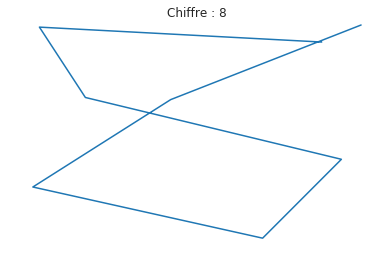

In [3]:
def dessin(p, x, y, ch):
    p.plot(x, y)                         # dessin du tracé dans le sous-graphique p
    p.set_title("Chiffre : " + str(ch))  # ajout d'un titre
    p.axis("off")                        # suppresion des axes
    p.set_xlim([-1, 101])                # définition des limites en x
    p.set_ylim([-1, 101])                # définition des limites en y

f, sp = plt.subplots()
dessin(sp, pen.loc[0, xN], pen.loc[0, yN], pen.loc[0, "chiffre"])

### Premier tracé de chaque chiffre

Nous utilisons ici la fonction `dessin()` pour représenter le tracé de chaque premier exemple des chiffres. Dans un premier temps, pour chaque sous-ensemble dans `sub`, nous créons une liste avec les informations nécessaires ($x_j$, $y_j$, et chiffre). 

Ensuite, nous créons une figure, en paramètrant la taille de celle-ci pour maximiser l'affichage. Puis, pour chaque chiffre de 0 à 9 (ce qui correspond au résultat de `range(10)`), nous ajoutons un sous-graphique et nous dessinons dedans le chiffre.

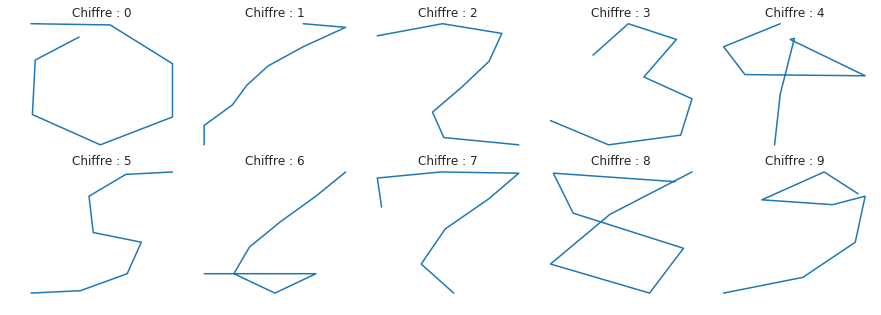

In [4]:
# Sélection du premier exemple de chaque chiffre
premier = [[s.loc[0, xN], s.loc[0, yN], s.loc[0, "chiffre"]] for s in sub]

# Création de la figure
f = plt.figure(figsize = (15, 5))

# Ajout du premier tracé pour chaque chiffre à la figure
for i in range(10):
    sp = f.add_subplot(2, 5, i + 1)
    dessin(sp, premier[i][0], premier[i][1], premier[i][2])

### Calcul du tracé moyen, pour chaque chiffre

La fonction `mean()` appliqué à un `DataFrame` nous permet de récupérer la moyenne de chaque colonne de celui-ci. Nous utilisons donc les sous-ensembles créés dans `sub` pour le faire pour chaque chiffre, et pour chaque coordonnées (les $x_j$ puis les $y_j$).

Nous avons donc à la fin le tracé *moyen* de chaque chiffre.

In [5]:
# Calcul des moyennes des x_j et des x_y
moyen = [[s[xN].mean(), s[yN].mean()] for s in sub]

### Amélioration de la fonction `dessin()`

Nous ajoutons une fonctionnalité dans la fonction `dessin()`. Celle-ci va aussi indiqué la position de chaque point, afin de mieux comprendre le tracé fait par le scripteur. Pour cela, nous ajoutons un paramètre (`pos`), qui sera faux au départ (`False`). Si celui-ci est vrai (`True`), nous écrivons la position pour chaque point (de 1 à 8 donc). 

Voici son utilisaton sur le premier tracé.

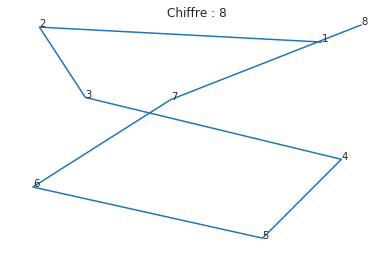

In [6]:
def dessin(p, x, y, ch, pos = False):
    p.plot(x, y)
    p.set_title("Chiffre : " + str(ch))
    p.axis("off")
    p.set_xlim([-1, 101])
    p.set_ylim([-1, 101])
    if (pos):                             # test si on souhaite ajouter les positions
        for i in range(8):                # boucle de 0 à 7
            p.text(x[i], y[i], str(i+1))  # ajout de la position

f, sp = plt.subplots()
dessin(sp, pen.loc[0, xN], pen.loc[0, yN], pen.loc[0, "chiffre"], pos = True)

### Représenter le tracé des chiffres moyens 

En reprenant le code pour le premier tracé de chaque exemple, et en utilisant le `DataFrame` `moy`, nous pouvons représenter le tracé moyen de chaque chiffre.

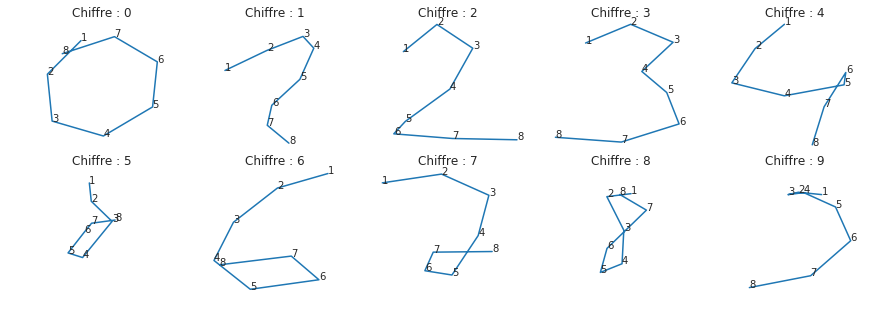

In [7]:
# Création de la figure
fig = plt.figure(figsize = (15, 5))

# Ajout du tracé moyen de chaque chiffre, avec ajout de la position
for c in range(10):
    p = fig.add_subplot(2, 5, c + 1)
    dessin(p, moyen[c][0], moyen[c][1], c, True)

On peut voir que certains chiffres ont un tracé moyen très cohérent ($0$, $2$, $3$, $4$, $6$, $8$). D'autres le sont un peu moins ($1$, $7$). Enfin, les chiffres $5$ et $9$ ont un tracé moyen surprenant. Ceci indique qu'il existe peut-être une variabilité forte des tracés des différents scripteurs. 

Pour explorer cela, la première chose que l'on peut faire est de créer les boîtes à moustaches de chaque coordonnée, pour chaque chiffre, afin de les comparer.

Pour réaliser ce graphique facilement, il faut transformer le format du `DataFrame` `pen`, en ayant une colonne `chiffre`, une colonne `variable` ($x_1$, $x_2$, ..., $y_8$), une colonne `value` (qui sera la valeur de la coordonnée).

Ensuite, on calcule quelle coordonnée est sur chaque ligne ($x$ ou $y$), en premier le premier caractère de `variable`. Et pour savoir quel point (de $1$ à $8$), on récupère le deuxième caractère.

In [8]:
# Transformation de pen
pen_m = pandas.melt(pen[xyN].assign(chiffre = pen.chiffre_str), id_vars = "chiffre")

# Calcul de la coordonnée (x ou y) et du point (de 1 à 8)
pen_m = pen_m.assign(coord = [v[0] for v in pen_m.variable],
                     point = [v[1] for v in pen_m.variable])

# Affichage des premières lignes de la table créée
pen_m.head()

,chiffre,variable,value,coord,point
0,8,x1,88,x,1
1,8,x1,80,x,1
2,8,x1,0,x,1
3,9,x1,95,x,1
4,9,x1,68,x,1


Avec cette table, on peut maintenant créer les boîtes à moustaches grâce à la fonction `factorplot()`  de `seaborn`. On met en `x` le chiffre représenté, en `y` la valeur. Et pour avoir chaque coordonnée pour chaque point, on découpe le graphique en ligne (`row`) sur les points et en colonnes (`col`) sur les coordonnées.

Les deux premiers graphiques en haut représentent donc respectivement les boxplots de $x_1$ et de $y_1$ pour chaque chiffre. On peut y voir par exemple que les coordonnées $y_1$ des chiffres $4$ et $6$ sont très localisés à la valeur $100$ (sauf quelques outliers).

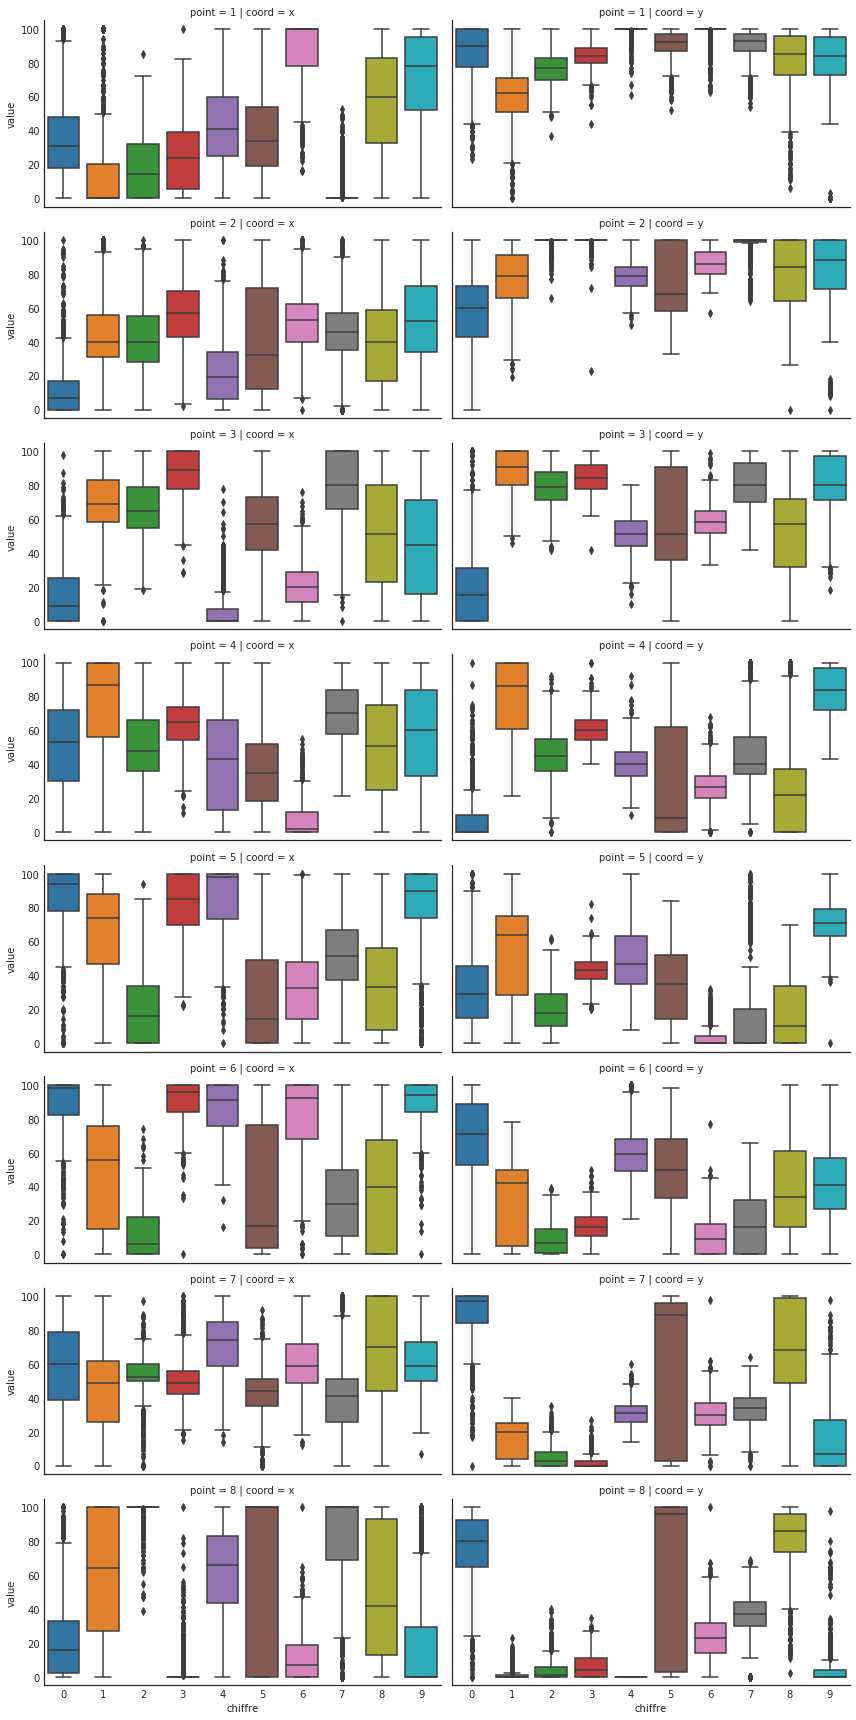

In [9]:
seaborn.factorplot(x = "chiffre", y = "value", kind = "box", data = pen_m, 
                   col = "coord", row = "point", size = 3, aspect = 2)

### Réalisation de l'ACP

On voit très clairement que ces 160 boîtes à moustaches sont très compliquées à analyser globalement. Il nous faut donc une méthode de représentation dans un sous-espace, ce que nous permet en effet l'ACP.

Les variables étant toutes de même unité et avec la même étendue (de $0$ à $100$), il n'est pas utile de faire une standardisation avant l'ACP.

In [10]:
# Importation de la fonction PCA()
from sklearn.decomposition import PCA

# Création de l'objet pour l'ACP et calcul de celle-ci
acp = PCA()
acp.fit(pen[xyN])
# calcul des projections des tracés sur les dimensions
pen_acp = acp.transform(pen[xyN])

On peut bien évidemment reprendre le code vu en cours pour afficher les parts de variances expliquées pour chaque dimensions. Nous voyons qu'avec deux dimensions, nous réussissons tout de même à avoir 53% de l'information.

In [11]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(pen[xyN].shape[1])], 
        "Valeur propre" : numpy.round(acp.explained_variance_),
        "% variance expliquée" : numpy.round(acp.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(acp.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig.head()

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4214.0,28.0,28.0
1,Dim2,3702.0,25.0,53.0
2,Dim3,2286.0,15.0,69.0
3,Dim4,1341.0,9.0,78.0
4,Dim5,862.0,6.0,83.0


Nous allons maintenant créer le `DataFrame` contenant les deux premières dimensions, ainsi que les chiffres tracés, pour les représenter sur le premier plan factoriel.

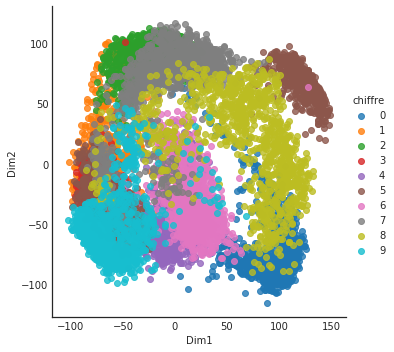

In [12]:
pen_acp_df =  pandas.DataFrame({
    "Dim1" : pen_acp[:,0], 
    "Dim2" : pen_acp[:,1], 
    "chiffre" : pen.chiffre_str
})

g_pca = seaborn.lmplot("Dim1", "Dim2", hue = "chiffre", 
                       data = pen_acp_df, fit_reg = False)

Il est difficile de réellement voir les différences entre les chiffre sur celui-ci. Pour mieux les comparer, nous pouvons représenter les projections des tracés sur un graphique différent pour chaque chiffre (grâce au découpage en colonnes et la limitation à 5 avec `col_wrap`). 

On voit maintenant que certains chiffres sont très groupés ($2$, $3$, $4$ et $6$ dans une moindre mesure). Il y a par contre une grande disparité pour d'autres ($0$, $1$, $7$, $8$ et très fortement $5$ avec deux groupes).

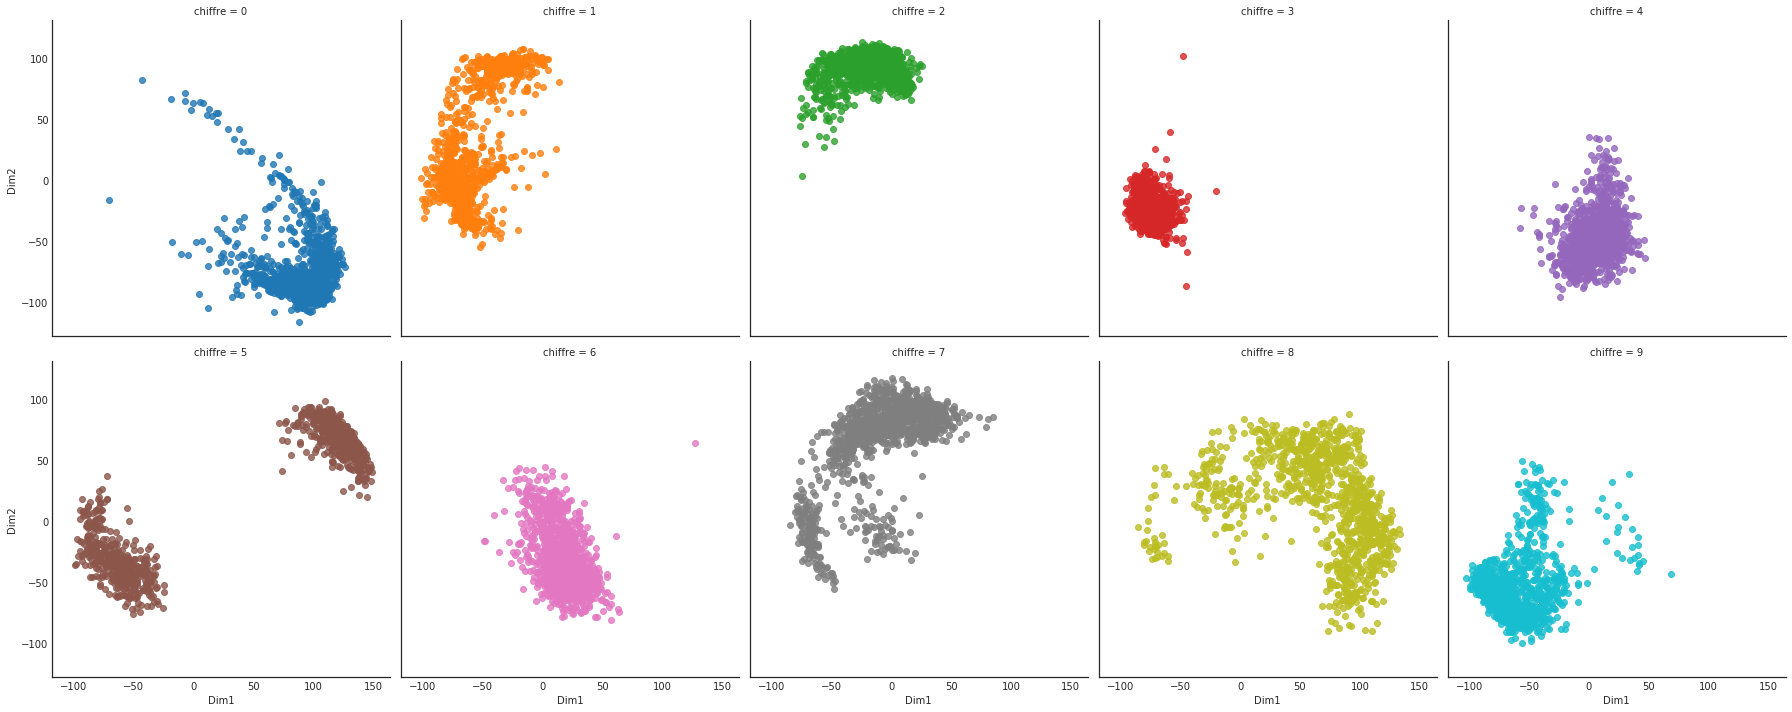

In [13]:
g_pca = seaborn.lmplot("Dim1", "Dim2", hue = "chiffre", 
                       col = "chiffre", col_wrap = 5,
                       data = pen_acp_df, fit_reg = False)

### Classification via DBSCAN pour chaque chiffre

Pour chercher s'il existe plusieurs façons d'écrire un chiffre, nous allons créer une fonction qui va prendre en paramètre 

- le chiffre qu'on cherche à analyser
- les paramètres de `DBSCAN()` (`eps` et `min_samples`)
- un paramètre pour dire si on veut l'affichage des points ou non

Nous allons ensuite procéder, pour chaque chiffre, en deux étapes :

1. test de différentes valeurs de paramètres pour chercher une partition avec peu d'outliers mais avec un nombre supérieur à 1 de classes (si possible), sans affichage
2. appliquer de nouveau la fonction, mais en ajoutant l'affichage pour voir le résultat de la partition

In [14]:
from sklearn.cluster import DBSCAN

def facons(c, eps = 40, nmin = 10, affichage = False):
    # c : chiffre à tester
    # esp : paramètre eps de DBSCAN (4 par défaut)
    # nmin : paramètre min_samples de DBSCAN (10 par défaut)
    # affichage : booléen pour dire si on affiche les graphiques ou non (False par défaut)
    db = DBSCAN(eps = eps, min_samples = nmin)            # paramétrisation de DBSCAN
    db.fit(sub[c])                                        # calcul de la partition
    eff = numpy.unique(db.labels_, return_counts = True)  # calcul des effectifs des partitions
    eff_df = pandas.DataFrame({ 
        "Classe" : eff[0],
        "Effectif" : eff[1],
        "Pourcentage" : [str(numpy.round(e / numpy.sum(eff[1]) * 100, 1)) + "%" for e in eff[1]]
    })
    print(eff_df)                                         # affichage de ceux-ci
    if (affichage):                                       # test si on veut les graphiques
        pca = pen_acp_df.query("chiffre == '" + str(c) + "'")             # sélection sur l'acp
        pca = pca.assign(Labels = db.labels_)                             # ajout des classes
        g = seaborn.lmplot("Dim1", "Dim2", 
                           hue = "Labels", col = "Labels",                # ACP
                           data = pca, fit_reg = False)
        g.set(xlim = (-105, 150), ylim = (-120, 120))                     # limites fixées
        tra = sub[c][xyN].assign(Labels = db.labels_)                     # tracés + classes
        moy = tra.groupby("Labels").mean()                                # tracés moyens
        fig = plt.figure(figsize = (15, 5))                               # dessin des tracés
        for i, l in zip(range(moy.shape[0]), moy.index):
            p = fig.add_subplot(1, moy.shape[0], i + 1)
            dessin(p, moy.loc[l, xN], moy.loc[l, yN], moy.index[i], True)

Voici comment on peut procéder pour le chiffre $0$. La première étape est un jeu d'essai/analyse. En fonction des valeurs des paramètres, les résultats sont variables

In [15]:
# Valeurs par défaut de la fontion (40 et 10) -> une seule classe et plusieurs outliers
facons(0)

   Classe  Effectif Pourcentage
0      -1        43        3.8%
1       0      1100       96.2%


In [16]:
# Classes plus homogènes, potentiellement plus petite -> bcp d'outliers
facons(0, eps = 20, nmin = 5)

   Classe  Effectif Pourcentage
0      -1       375       32.8%
1       0       732       64.0%
2       1        31        2.7%
3       2         5        0.4%


In [17]:
# Classes moins homogènes -> 2 classes et peu d'outliers (< 1%)
facons(0, eps = 65, nmin = 10)

   Classe  Effectif Pourcentage
0      -1        12        1.0%
1       0      1121       98.1%
2       1        10        0.9%


#### Chiffre $0$

Pour le $0$, il y a une classe très importante (98%) et une seconde classe (très petite, 1%) représentant potentiellement un scripteur avec un tracé particulier, vu le tracé moyen.

   Classe  Effectif Pourcentage
0      -1        12        1.0%
1       0      1121       98.1%
2       1        10        0.9%


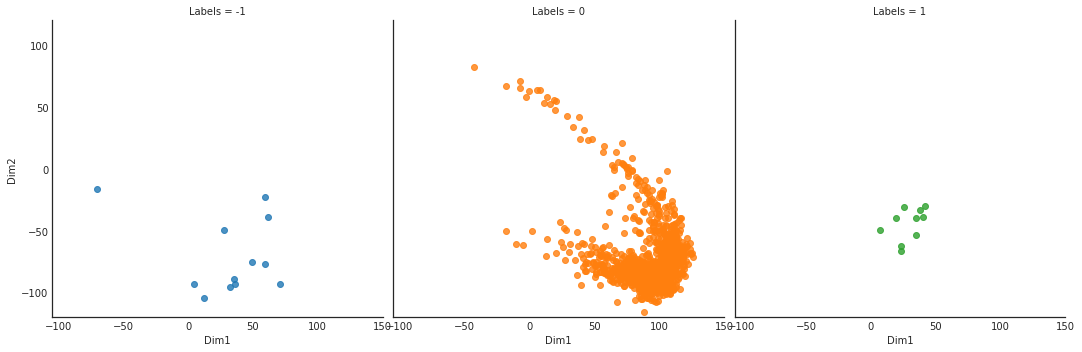

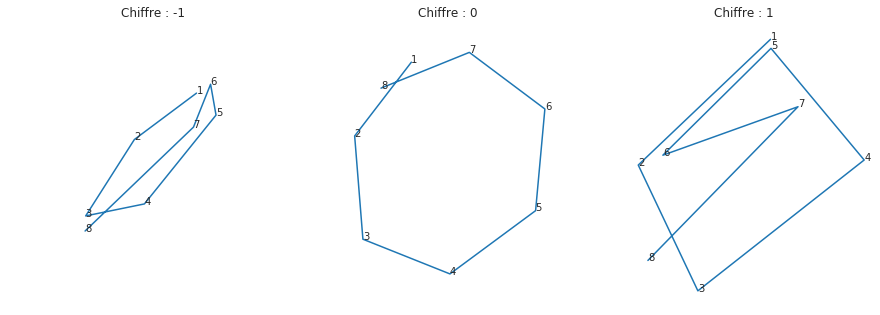

In [18]:
# Affichage du choix précédent
facons(0, eps = 65, nmin = 10, affichage = True)

#### Chiffre $1$

On a choisi ici de chercher des classes potentiellement plus petites, avec un nombre minimal d'individus à 5. On obtient ainsi 4 classes dont une très importante et 3 autres avec des tracés effectivement bien différents.

   Classe  Effectif Pourcentage
0      -1        41        3.6%
1       0      1073       93.9%
2       1         5        0.4%
3       2        13        1.1%
4       3        11        1.0%


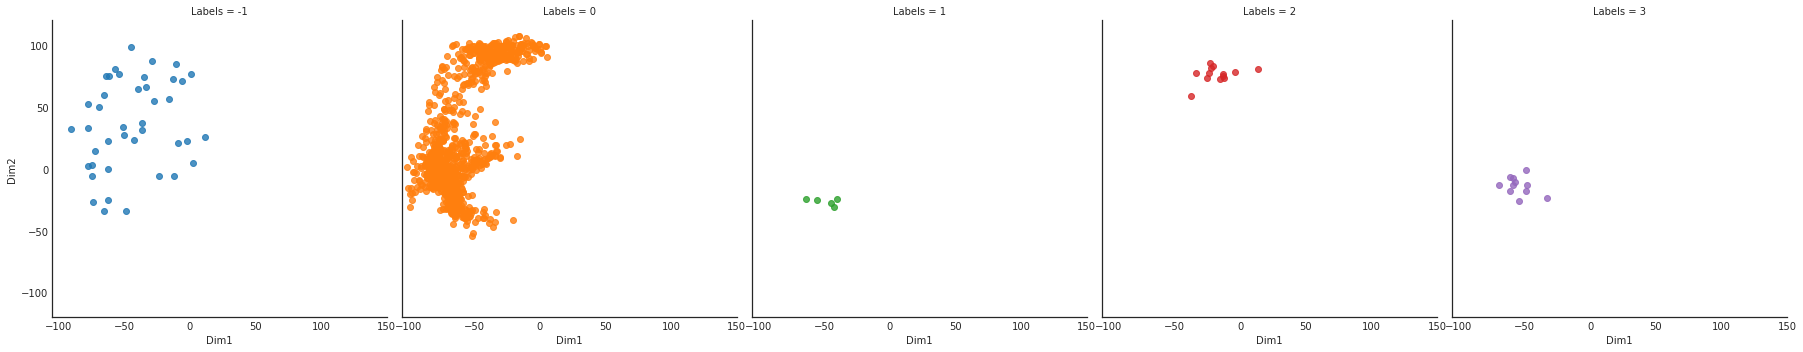

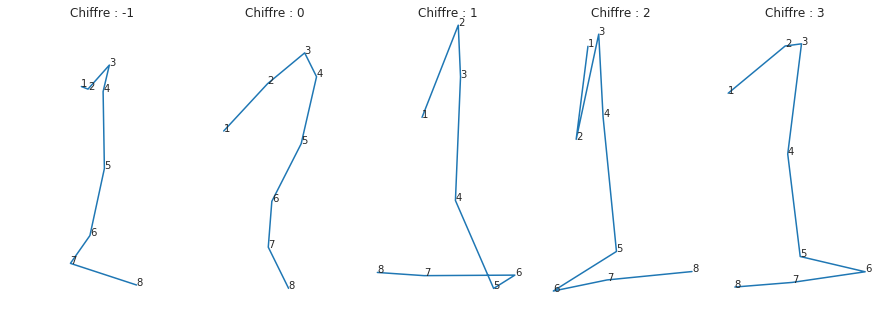

In [19]:
facons(1, eps = 40, nmin = 5, affichage = True)

#### Chiffre $2$

Ici, même en cherchant des très petites classes, tous les tracés sont classés dans la même grande classe. On remarque que même les *outliers* sont très similaires à la classe de base, vu le tracé moyen obtenu.

   Classe  Effectif Pourcentage
0      -1        73        6.4%
1       0      1071       93.6%


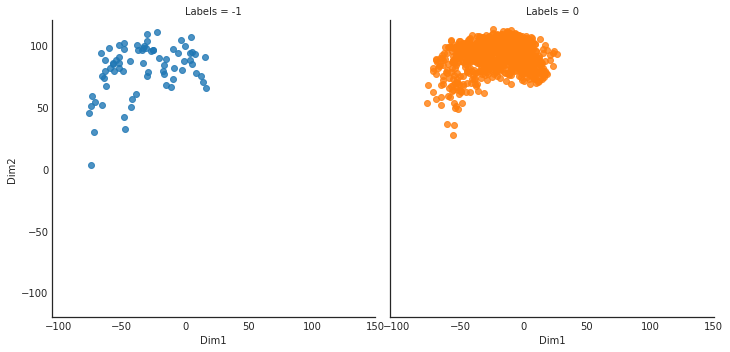

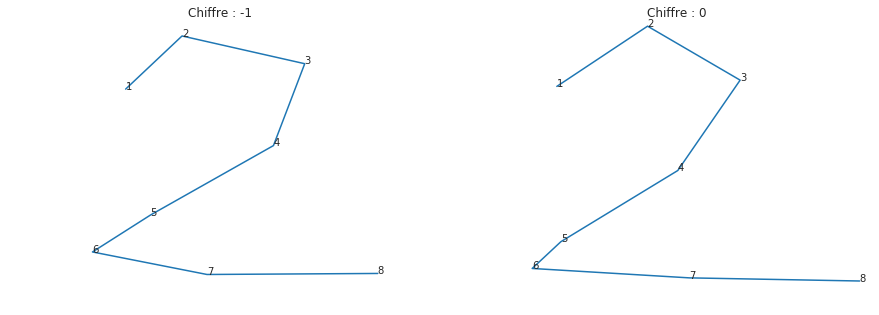

In [20]:
facons(2, eps = 25, nmin = 3, affichage = True)

#### Chiffre $3$

Ici, même en allant avec des réglages très fin (très petites classes et $\varepsilon$ petit), le résultat est une seule classe, avec peu d'*outliers*.

   Classe  Effectif Pourcentage
0      -1         9        0.9%
1       0      1046       99.1%


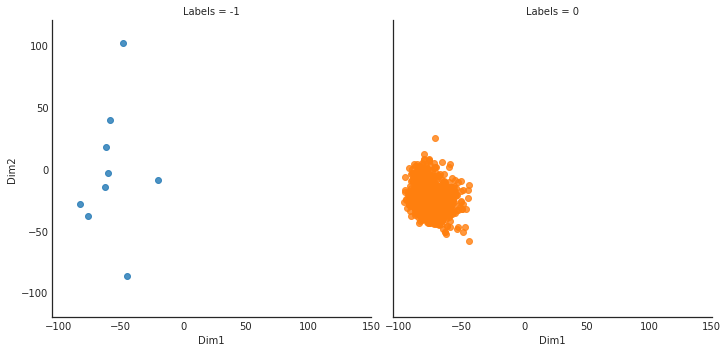

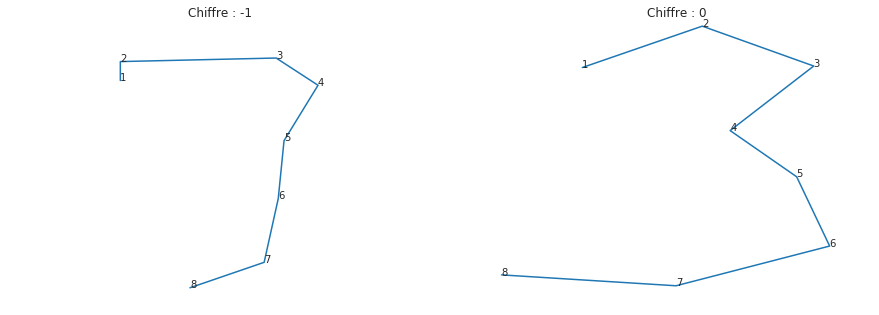

In [21]:
facons(3, eps = 40, nmin = 10, affichage = True)

#### Chiffre $4$

Pour ce chiffre, il n'existe aussi globalement qu'une seule façon d'écrire.

   Classe  Effectif Pourcentage
0      -1        28        2.4%
1       0      1116       97.6%


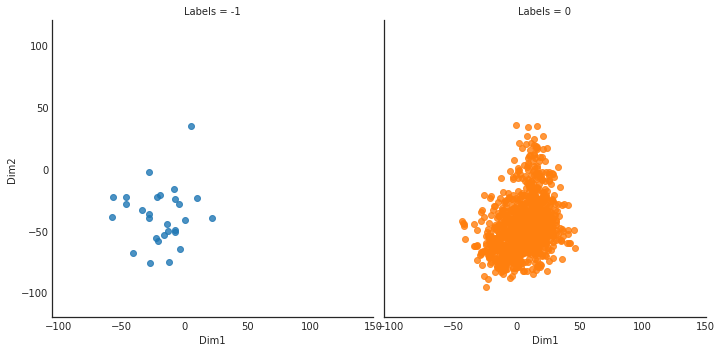

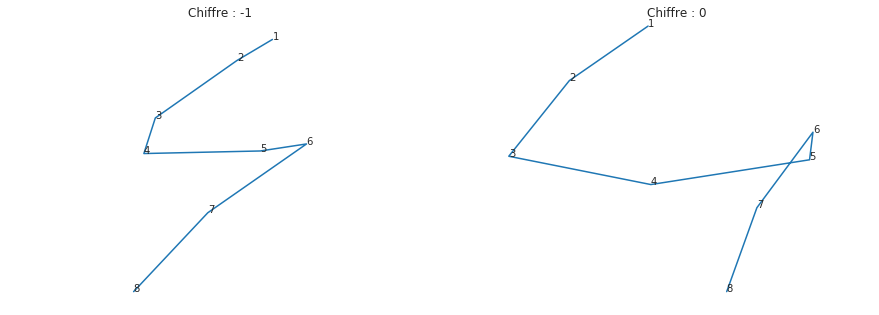

In [22]:
facons(4, eps = 40, nmin = 10, affichage = True)

#### Chiffre $5$

Avec un paramètrage légèrement différent ($\varepsilon$ plus petit et des plus petites classes), on obtient 3 classes et quelques *outliers*. Les trois classes différent effectivement beaucoup dans le tracé.

   Classe  Effectif Pourcentage
0      -1        29        2.7%
1       0       170       16.1%
2       1       611       57.9%
3       2       245       23.2%


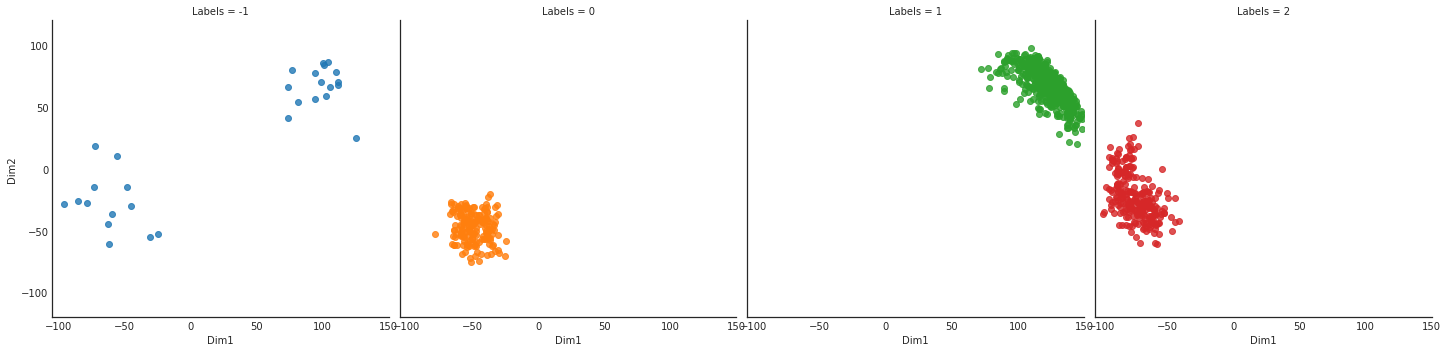

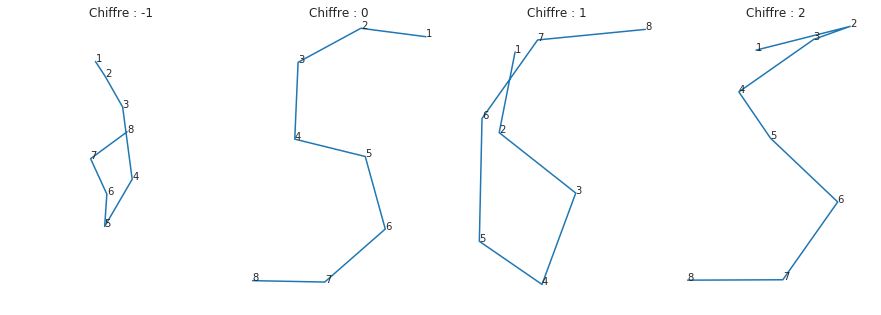

In [23]:
facons(5, eps = 35, nmin = 5, affichage = True)

#### Chiffre $6$

Comme déjà vu lors de l'ACP, les tracés sont tous dans une même classe, avec toutefois quelques *outliers*.

   Classe  Effectif Pourcentage
0      -1        18        1.7%
1       0      1038       98.3%


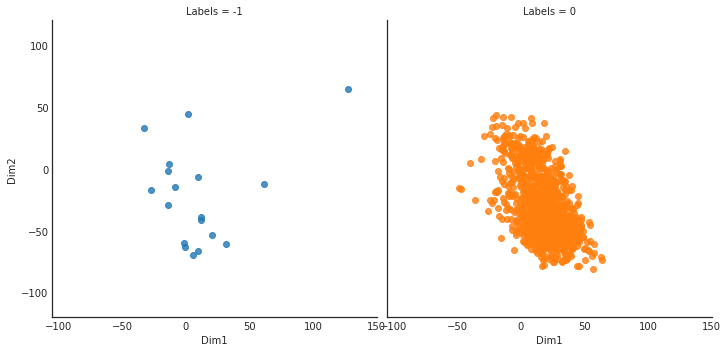

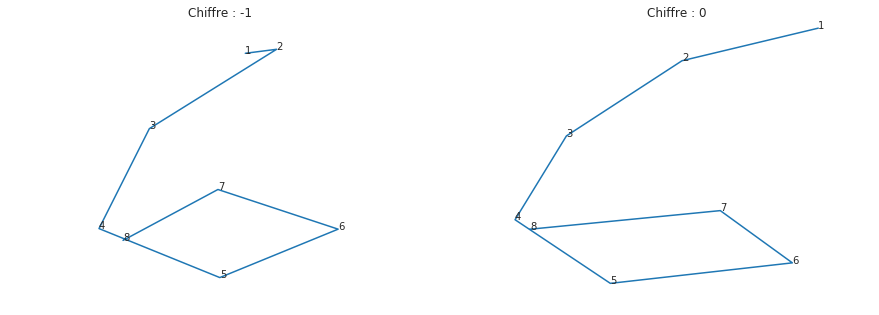

In [24]:
facons(6, eps = 40, nmin = 10, affichage = True)

#### Chiffre $7$

Encore une fois en diminuant légèrement les deux paramètres de `DBSCAN()`, nous obtenons 3 classes et quelques *outliers*. Les trois classes décrivent bien 3 façons différentes d'écrire le chiffre $7$.

   Classe  Effectif Pourcentage
0      -1        32        2.8%
1       0       143       12.5%
2       1       898       78.6%
3       2        69        6.0%


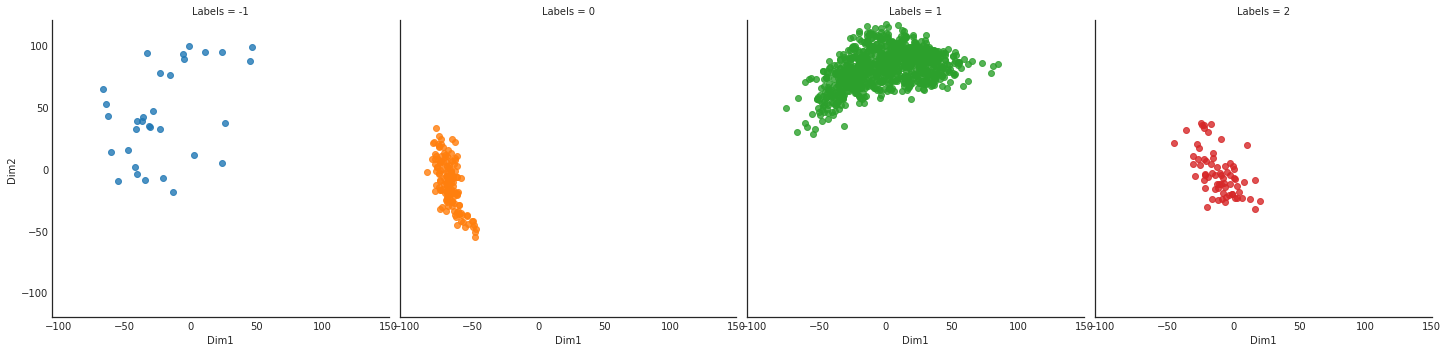

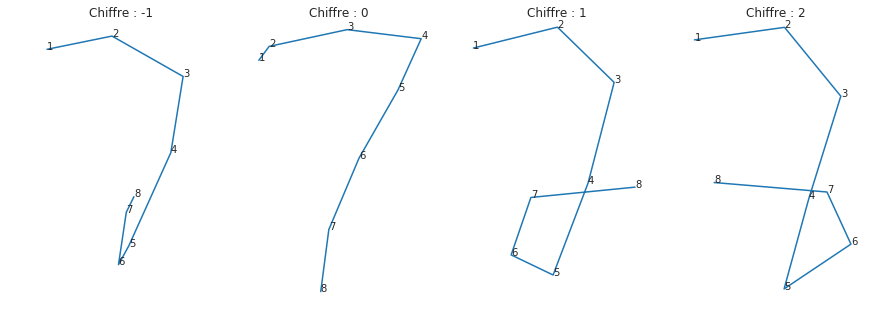

In [25]:
facons(7, eps = 35, nmin = 5, affichage = True)

#### Chiffre $8$

Malgré une valeur plus élevée pour $\varepsilon$, on obtient 4 classes et des *outliers*. Il existe une classe très majoritaire, et 3 petites classes, chacune avec un tracé moyen bien distinct des autres.

   Classe  Effectif Pourcentage
0      -1        46        4.4%
1       0       896       84.9%
2       1        46        4.4%
3       2        24        2.3%
4       3        43        4.1%


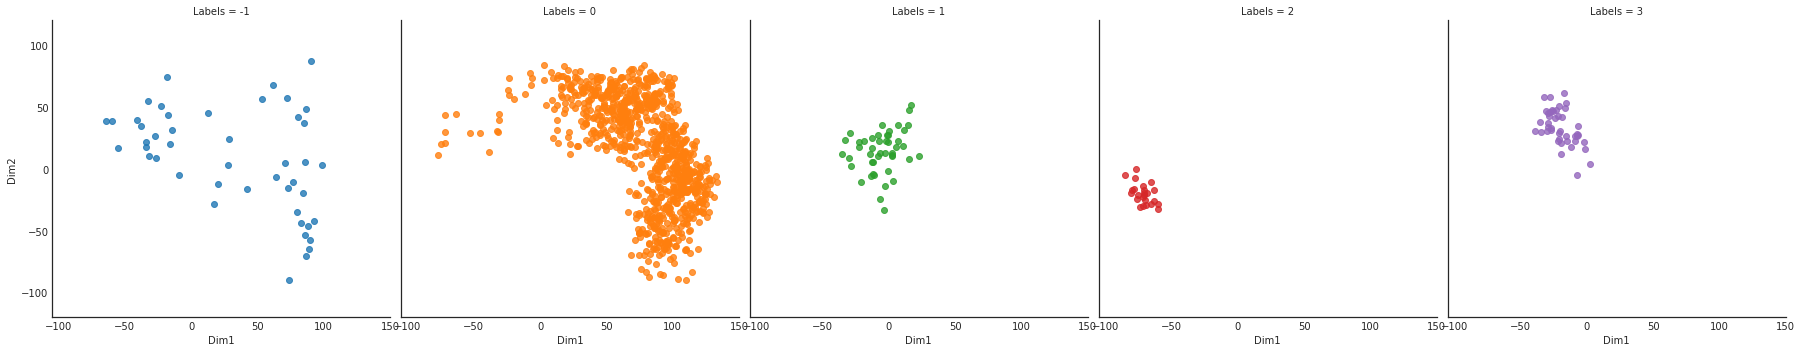

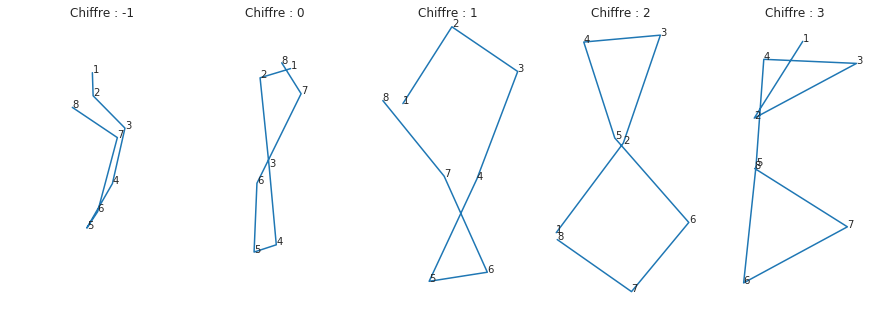

In [26]:
facons(8, eps = 50, nmin = 5, affichage = True)

#### Chiffre $9$

Encore une fois, il est intéressant de baisser le nombre minimal d'objets dans une classe. Ainsi, nous obtenons 4 classes, dont une très importante. Les trois autres concentrent des tracés certes atypiques, mais bien différents de la classe principale.

   Classe  Effectif Pourcentage
0      -1        83        7.9%
1       0       898       85.1%
2       1        45        4.3%
3       2        24        2.3%
4       3         5        0.5%


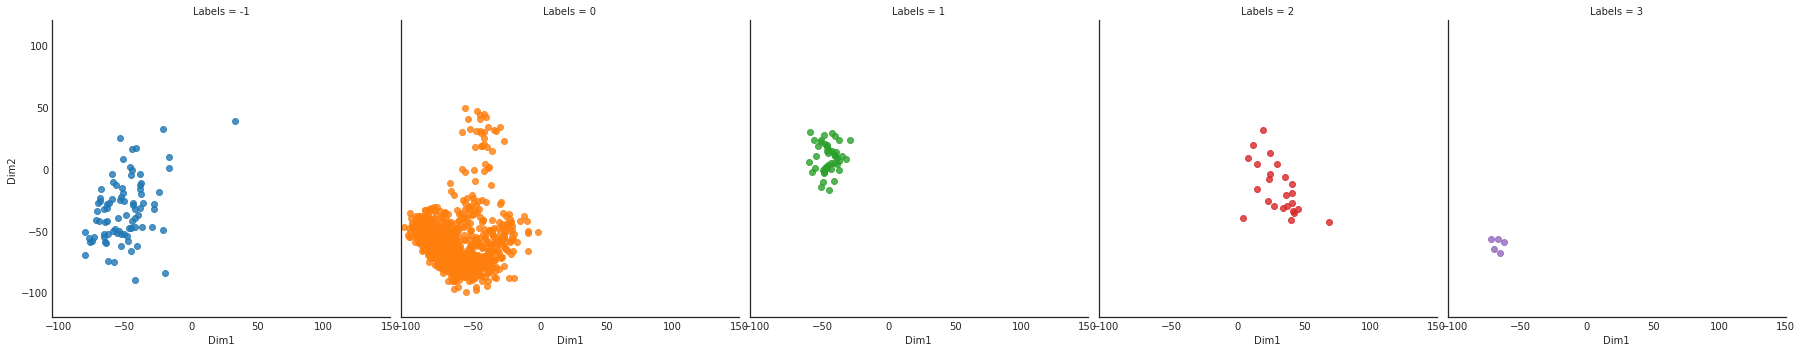

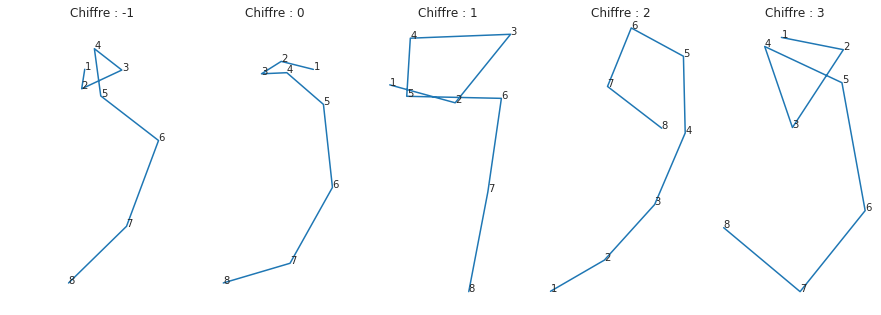

In [27]:
facons(9, eps = 40, nmin = 5, affichage = True)

## Conclusion

Nous avons donc vu ici comment deux méthodes statistiques classiques peuvent nous aider à répondre à la question de l'existence de plusieurs façons d'écrire chaque chiffre.